In [2]:
#A1
import numpy as np

def summation_unit(inputs, weights):
    """Calculate the weighted sum of inputs."""
    return np.dot(inputs, weights)

def step_activation(x):
    """Step activation function."""
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    """Bipolar step activation function."""
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def tanh_activation(x):
    """Tanh activation function."""
    return np.tanh(x)

def relu_activation(x):
    """ReLU activation function."""
    return max(0, x)

def leaky_relu_activation(x):
    """Leaky ReLU activation function."""
    return x if x > 0 else 0.01 * x

def comparator_unit(expected, output):
    """Calculate error."""
    return expected - output

def main():
    # Define inputs and weights for testing
    inputs = np.array([1, 0])  # Example input for AND gate
    weights = np.array([0.2, -0.75])  # Example weights

    # Calculate weighted sum
    weighted_sum = summation_unit(inputs, weights)
    print("Weighted Sum:", weighted_sum)

    # Test activation functions
    step_output = step_activation(weighted_sum)
    bipolar_output = bipolar_step_activation(weighted_sum)
    sigmoid_output = sigmoid_activation(weighted_sum)
    tanh_output = tanh_activation(weighted_sum)
    relu_output = relu_activation(weighted_sum)
    leaky_relu_output = leaky_relu_activation(weighted_sum)

    # Print outputs of activation functions
    print("Step Activation Output:", step_output)
    print("Bipolar Step Activation Output:", bipolar_output)
    print("Sigmoid Activation Output:", sigmoid_output)
    print("Tanh Activation Output:", tanh_output)
    print("ReLU Activation Output:", relu_output)
    print("Leaky ReLU Activation Output:", leaky_relu_output)

    # Test comparator unit
    expected_output = 1  # Expected output for AND gate
    error = comparator_unit(expected_output, step_output)
    print("Error (Comparator Unit):", error)

if __name__ == "__main__":
    main()

Weighted Sum: 0.2
Step Activation Output: 1
Bipolar Step Activation Output: 1
Sigmoid Activation Output: 0.549833997312478
Tanh Activation Output: 0.197375320224904
ReLU Activation Output: 0.2
Leaky ReLU Activation Output: 0.2
Error (Comparator Unit): 0


Final Weights: [5.00000000e-02 9.71445147e-17]


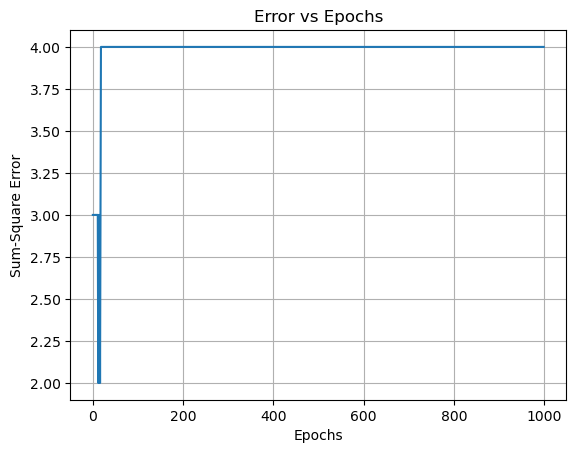

In [4]:
#A2
import numpy as np
import matplotlib.pyplot as plt

def summation_unit(inputs, weights):
    """Calculate the weighted sum of inputs."""
    return np.dot(inputs, weights)

def step_activation(x):
    """Step activation function."""
    return 1 if x >= 0 else 0

def comparator_unit(expected, output):
    """Calculate error."""
    return expected - output

def perceptron_and_gate(inputs, weights, learning_rate=0.05, epochs=1000):
    """Train perceptron for AND gate."""
    weights = np.array(weights, dtype=float)  # Ensure weights are a NumPy array
    error_list = []

    for epoch in range(epochs):
        total_error = 0
        for x, expected in inputs:
            x = np.array(x, dtype=float)  # Ensure inputs are a NumPy array
            weighted_sum = summation_unit(x, weights)
            output = step_activation(weighted_sum)
            error = comparator_unit(expected, output)
            total_error += error ** 2
            weights += learning_rate * error * x  # Update weights
        
        error_list.append(total_error)
        if total_error <= 0.002:
            break

    return weights, error_list

def plot_errors(errors):
    """Plot the error values against epochs."""
    plt.plot(errors)
    plt.title('Error vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Square Error')
    plt.grid()
    plt.show()

def main():
    # Define inputs for AND gate
    and_inputs = [([0, 0], 0), ([0, 1], 0), ([1, 0], 0), ([1, 1], 1)]
    initial_weights = [0.2, -0.75]

    # Train the perceptron
    final_weights, errors = perceptron_and_gate(and_inputs, initial_weights)
    print("Final Weights:", final_weights)

    # Plot the errors
    plot_errors(errors)

if __name__ == "__main__":
    main()

Final Weights with Bipolar Step: [0.1  0.05]


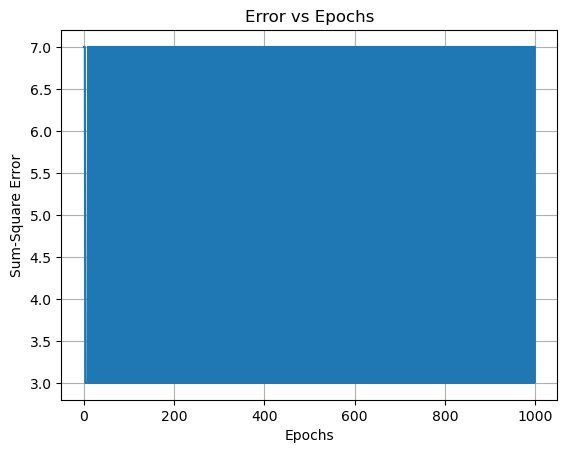

Final Weights with Sigmoid: [0.01680838 0.01680506]


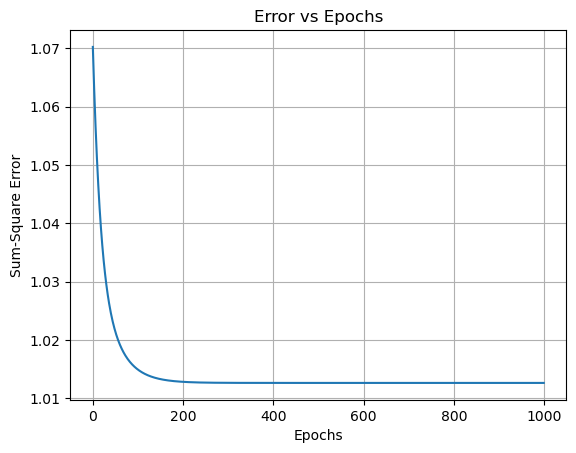

Final Weights with ReLU: [0.34482759 0.34482759]


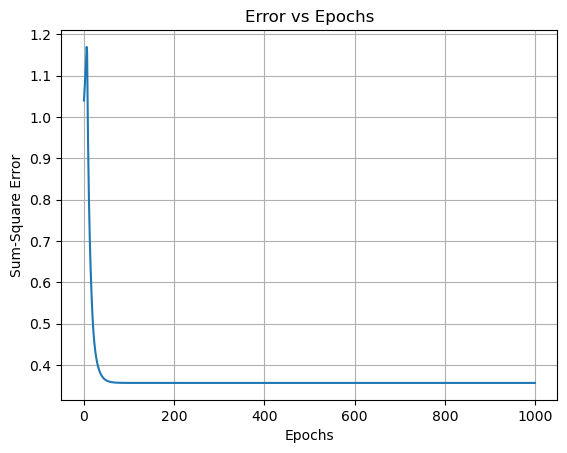

In [6]:
#A3
import numpy as np
import matplotlib.pyplot as plt

def summation_unit(inputs, weights):
    """Calculate the weighted sum of inputs."""
    return np.dot(inputs, weights)

def step_activation(x):
    """Step activation function."""
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    """Bipolar step activation function."""
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    """ReLU activation function."""
    return max(0, x)

def comparator_unit(expected, output):
    """Calculate error."""
    return expected - output

def perceptron_with_activation(inputs, weights, activation_function, learning_rate=0.05, epochs=1000):
    """Train perceptron with specified activation function."""
    weights = np.array(weights, dtype=float)  # Ensure weights are a NumPy array
    error_list = []

    for epoch in range(epochs):
        total_error = 0
        for x, expected in inputs:
            x = np.array(x, dtype=float)  # Ensure inputs are a NumPy array
            weighted_sum = summation_unit(x, weights)
            output = activation_function(weighted_sum)
            error = comparator_unit(expected, output)
            total_error += error ** 2
            weights += learning_rate * error * x  # Update weights
        
        error_list.append(total_error)
        if total_error <= 0.002:
            break

    return weights, error_list

def plot_errors(errors):
    """Plot the error values against epochs."""
    plt.plot(errors)
    plt.title('Error vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Square Error')
    plt.grid()
    plt.show()

def main():
    # Define inputs for AND gate
    and_inputs = [([0, 0], 0), ([0, 1], 0), ([1, 0], 0), ([1, 1], 1)]
    initial_weights = [0.2, -0.75]

    # Test different activation functions
    activation_functions = {
        "Bipolar Step": bipolar_step_activation,
        "Sigmoid": sigmoid_activation,
        "ReLU": relu_activation
    }

    for name, func in activation_functions.items():
        final_weights, errors = perceptron_with_activation(and_inputs, initial_weights, func)
        print(f"Final Weights with {name}:", final_weights)
        plot_errors(errors)

if __name__ == "__main__":
    main()

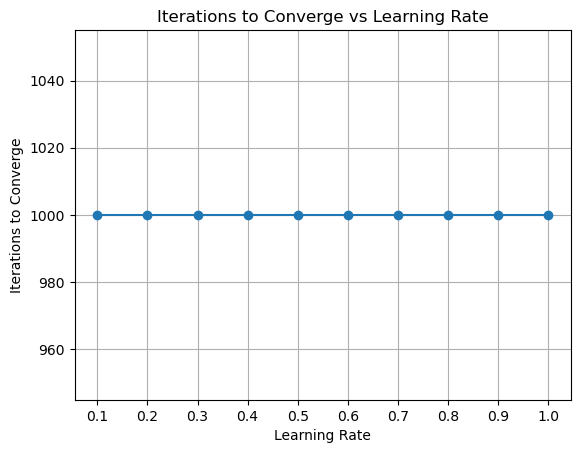

In [8]:
#A4
import numpy as np
import matplotlib.pyplot as plt

def summation_unit(inputs, weights):
    """Calculate the weighted sum of inputs."""
    return np.dot(inputs, weights)

def step_activation(x):
    """Step activation function."""
    return 1 if x >= 0 else 0

def comparator_unit(expected, output):
    """Calculate error."""
    return expected - output

def perceptron_with_learning_rate(inputs, weights, learning_rate, epochs=1000):
    """Train perceptron with specified learning rate."""
    weights = np.array(weights, dtype=float)  # Ensure weights are a NumPy array
    for epoch in range(epochs):
        total_error = 0
        for x, expected in inputs:
            x = np.array(x, dtype=float)  # Ensure inputs are a NumPy array
            weighted_sum = summation_unit(x, weights)
            output = step_activation(weighted_sum)
            error = comparator_unit(expected, output)
            total_error += error ** 2
            weights += learning_rate * error * x  # Update weights
        
        if total_error <= 0.002:
            return epoch + 1  # Return the number of iterations taken to converge
    
    return epochs  # Return max epochs if not converged

def main():
    # Define inputs for AND gate
    and_inputs = [([0, 0], 0), ([0, 1], 0), ([1, 0], 0), ([1, 1], 1)]
    initial_weights = [0.2, -0.75]
    
    # Define learning rates to test
    learning_rates = np.arange(0.1, 1.1, 0.1)  # From 0.1 to 1.0
    iterations = []

    # Test each learning rate
    for lr in learning_rates:
        iters = perceptron_with_learning_rate(and_inputs, initial_weights, lr)
        iterations.append(iters)

    # Plotting the results
    plt.plot(learning_rates, iterations, marker='o')
    plt.title('Iterations to Converge vs Learning Rate')
    plt.xlabel('Learning Rate')
    plt.ylabel('Iterations to Converge')
    plt.xticks(learning_rates)
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()

Final Weights with Step Activation: [-0.05 -0.05]


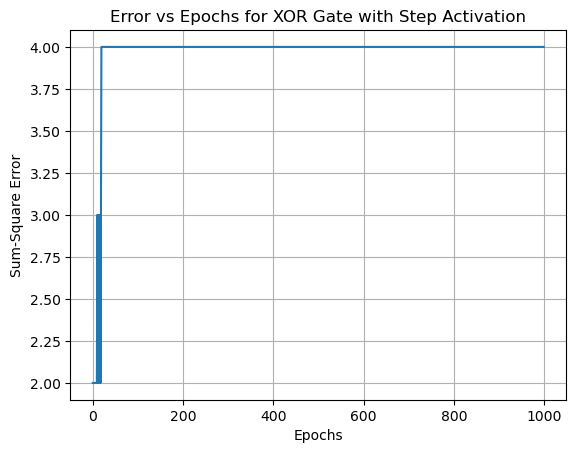

Final Weights with Bipolar Step Activation: [1.38777878e-17 5.00000000e-02]


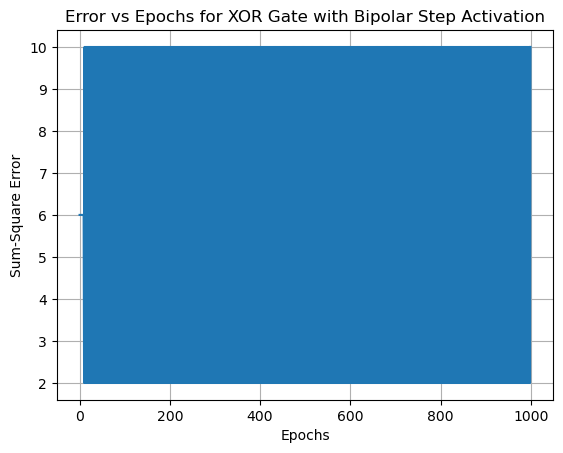

Final Weights with Sigmoid Activation: [-0.01680506 -0.01680838]


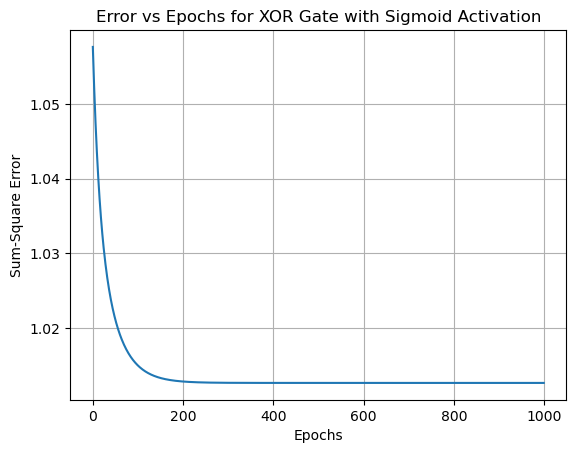

Final Weights with Tanh Activation: [0.35946528 0.35946528]


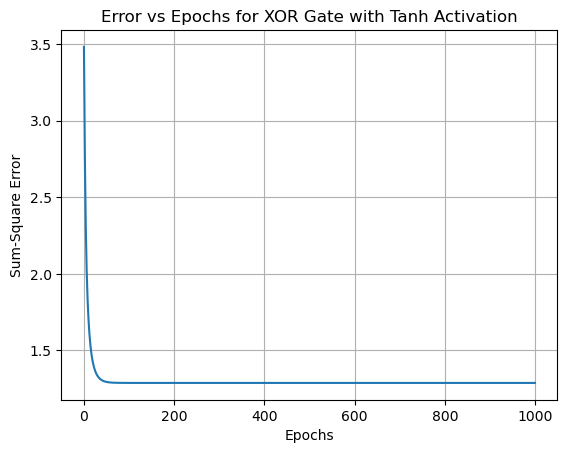

Final Weights with ReLU Activation: [0.31034483 0.31034483]


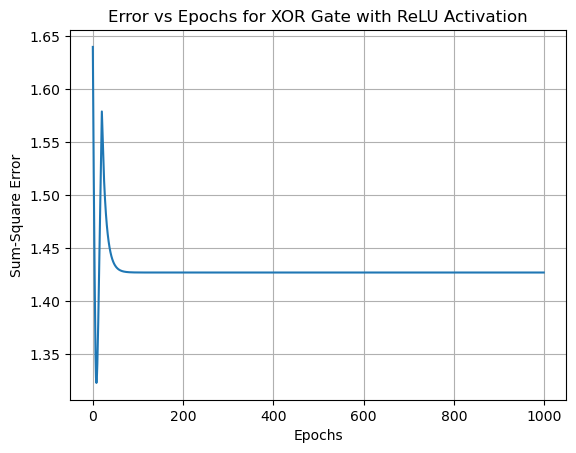

In [10]:
#A5
import numpy as np
import matplotlib.pyplot as plt

def summation_unit(inputs, weights):
    """Calculate the weighted sum of inputs."""
    return np.dot(inputs, weights)

def step_activation(x):
    """Step activation function."""
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    """Bipolar step activation function."""
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def tanh_activation(x):
    """Tanh activation function."""
    return np.tanh(x)

def relu_activation(x):
    """ReLU activation function."""
    return max(0, x)

def comparator_unit(expected, output):
    """Calculate error."""
    return expected - output

def perceptron_xor_gate(inputs, weights, activation_function, learning_rate=0.05, epochs=1000):
    """Train perceptron for XOR gate."""
    weights = np.array(weights, dtype=float)  # Ensure weights are a NumPy array
    error_list = []

    for epoch in range(epochs):
        total_error = 0
        for x, expected in inputs:
            x = np.array(x, dtype=float)  # Ensure inputs are a NumPy array
            weighted_sum = summation_unit(x, weights)
            output = activation_function(weighted_sum)
            error = comparator_unit(expected, output)
            total_error += error ** 2
            weights += learning_rate * error * x  # Update weights
        
        error_list.append(total_error)
        if total_error <= 0.002:
            break

    return weights, error_list

def plot_errors(errors, title):
    """Plot the error values against epochs."""
    plt.plot(errors)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Square Error')
    plt.grid()
    plt.show()

def main():
    # Define inputs for XOR gate
    xor_inputs = [([0, 0], 0), ([0, 1], 1), ([1, 0], 1), ([1, 1], 0)]
    initial_weights = [0.2, -0.75]  # Initial weights

    # Test different activation functions
    activation_functions = {
        "Step": step_activation,
        "Bipolar Step": bipolar_step_activation,
        "Sigmoid": sigmoid_activation,
        "Tanh": tanh_activation,
        "ReLU": relu_activation
    }

    for name, func in activation_functions.items():
        final_weights, errors = perceptron_xor_gate(xor_inputs, initial_weights, func)
        print(f"Final Weights with {name} Activation:", final_weights)
        plot_errors(errors, f'Error vs Epochs for XOR Gate with {name} Activation')

if __name__ == "__main__":
    main()

Final Weights for Customer Data: [-265.77974389   39.0042149  -102.7279545    23.04889472]


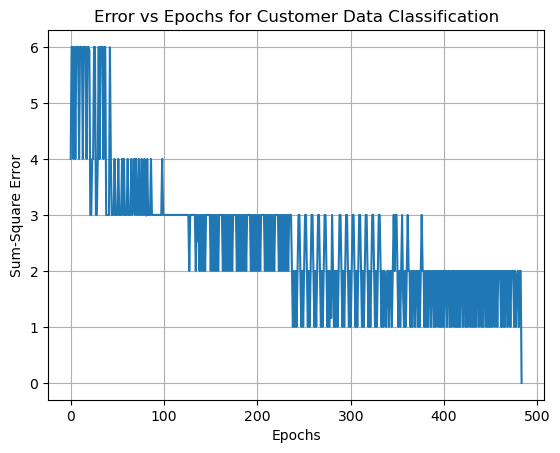

In [13]:
#A6
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # For stable sigmoid function

def summation_unit(inputs, weights):
    """Calculate the weighted sum of inputs."""
    return np.dot(inputs, weights)

def sigmoid_activation(x):
    """Sigmoid activation function."""
    return expit(x)

def comparator_unit(expected, output):
    """Calculate error."""
    return expected - output

def perceptron_customer_data(inputs, weights, learning_rate=0.05, epochs=1000):
    """Train perceptron for customer data classification."""
    weights = np.array(weights, dtype=float)  # Ensure weights are a NumPy array
    error_list = []

    for epoch in range(epochs):
        total_error = 0
        for x, expected in inputs:
            x = np.array(x, dtype=float)  # Ensure inputs are a NumPy array
            weighted_sum = summation_unit(x, weights)
            output = sigmoid_activation(weighted_sum)
            error = comparator_unit(expected, output)
            total_error += error ** 2
            weights += learning_rate * error * x  # Update weights
        
        error_list.append(total_error)
        if total_error <= 0.002:
            break

    return weights, error_list

def plot_errors(errors):
    """Plot the error values against epochs."""
    plt.plot(errors)
    plt.title('Error vs Epochs for Customer Data Classification')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Square Error')
    plt.grid()
    plt.show()

def main():
    # Define customer data
    customer_data = [
        ([20, 6, 2, 386], 1),  # High Value Transaction
        ([16, 3, 6, 289], 1),  # High Value Transaction
        ([27, 6, 2, 393], 1),  # High Value Transaction
        ([19, 1, 2, 110], 0),  # Low Value Transaction
        ([24, 4, 2, 280], 1),  # High Value Transaction
        ([22, 1, 5, 167], 0),  # Low Value Transaction
        ([15, 4, 2, 271], 1),  # High Value Transaction
        ([18, 4, 2, 274], 1),  # High Value Transaction
        ([21, 1, 4, 148], 0),  # Low Value Transaction
        ([16, 2, 4, 198], 0)   # Low Value Transaction
    ]

    initial_weights = [0.1, 0.1, 0.1, 0.1]  # Initial weights

    # Train the perceptron for customer data classification
    final_weights, errors = perceptron_customer_data(customer_data, initial_weights)
    print("Final Weights for Customer Data:", final_weights)

    # Plot the errors
    plot_errors(errors)

if __name__ == "__main__":
    main()

Final Weights from Perceptron Learning: [0.01680672 0.01680672]
Weights from Pseudo-Inverse Learning: [0.33333333 0.33333333]


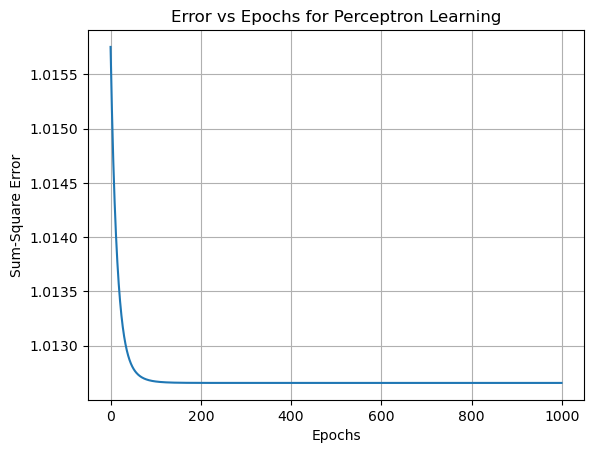

In [15]:
#A7
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # For stable sigmoid function

def summation_unit(inputs, weights):
    """Calculate the weighted sum of inputs."""
    return np.dot(inputs, weights)

def sigmoid_activation(x):
    """Sigmoid activation function."""
    return expit(x)

def comparator_unit(expected, output):
    """Calculate error."""
    return expected - output

def perceptron_learning(inputs, weights, learning_rate=0.05, epochs=1000):
    """Train perceptron for classification."""
    weights = np.array(weights, dtype=float)  # Ensure weights are a NumPy array
    error_list = []

    for epoch in range(epochs):
        total_error = 0
        for x, expected in inputs:
            x = np.array(x, dtype=float)  # Ensure inputs are a NumPy array
            weighted_sum = summation_unit(x, weights)
            output = sigmoid_activation(weighted_sum)
            error = comparator_unit(expected, output)
            total_error += error ** 2
            weights += learning_rate * error * x  # Update weights
        
        error_list.append(total_error)
        if total_error <= 0.002:
            break

    return weights, error_list

def pseudo_inverse_learning(inputs):
    """Calculate weights using pseudo-inverse."""
    X = np.array([x for x, _ in inputs])  # Extract features
    y = np.array([expected for _, expected in inputs])  # Extract expected outputs
    X_pseudo_inverse = np.linalg.pinv(X)  # Calculate pseudo-inverse
    weights = np.dot(X_pseudo_inverse, y)  # Calculate weights
    return weights

def plot_errors(errors):
    """Plot the error values against epochs."""
    plt.plot(errors)
    plt.title('Error vs Epochs for Perceptron Learning')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Square Error')
    plt.grid()
    plt.show()

def main():
    # Define inputs for AND gate
    and_inputs = [([0, 0], 0), ([0, 1], 0), ([1, 0], 0), ([1, 1], 1)]
    initial_weights = [0.1, 0.1]  # Initial weights for perceptron

    # Train the perceptron
    final_weights, errors = perceptron_learning(and_inputs, initial_weights)
    print("Final Weights from Perceptron Learning:", final_weights)

    # Calculate weights using pseudo-inverse
    pseudo_weights = pseudo_inverse_learning(and_inputs)
    print("Weights from Pseudo-Inverse Learning:", pseudo_weights)

    # Plot the errors from perceptron learning
    plot_errors(errors)

if __name__ == "__main__":
    main()

In [16]:
#A8
from sklearn.neural_network import MLPClassifier

def train_mlp_and_gate():
    """Train MLP for AND gate using scikit-learn."""
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 0, 0, 1])
    mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', learning_rate_init=0.05, max_iter=1000)
    mlp.fit(X, y)
    return mlp

mlp_model = train_mlp_and_gate()
print("MLP Weights for AND Gate:", mlp_model.coefs_)

MLP Weights for AND Gate: [array([[-4.26084969,  4.72367687],
       [-4.28013259,  4.72661034]]), array([[-5.05311687],
       [ 5.62248806]])]


Final Weights with Step Activation: [-0.05 -0.05]


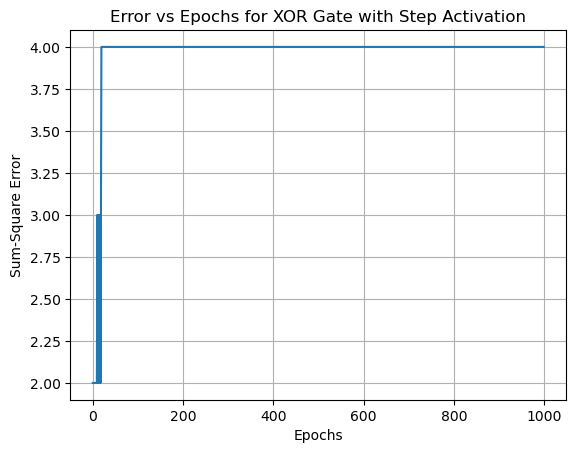

Final Weights with Bipolar Step Activation: [1.38777878e-17 5.00000000e-02]


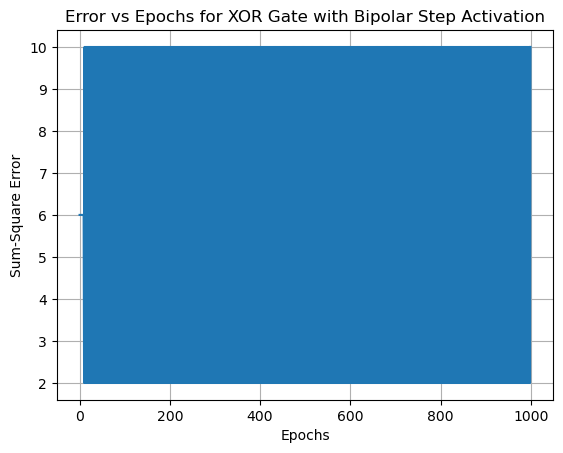

Final Weights with Sigmoid Activation: [-0.01680506 -0.01680838]


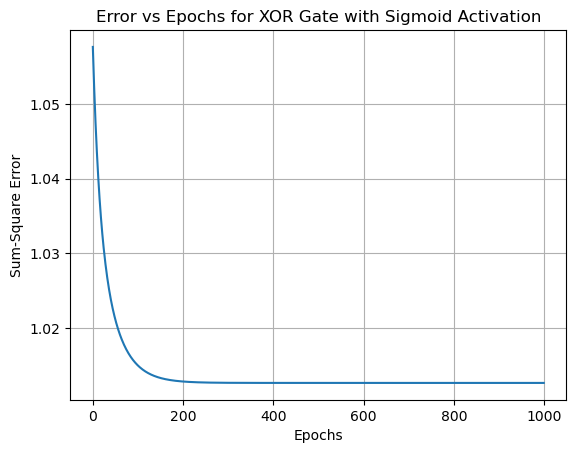

Final Weights with Tanh Activation: [0.35946528 0.35946528]


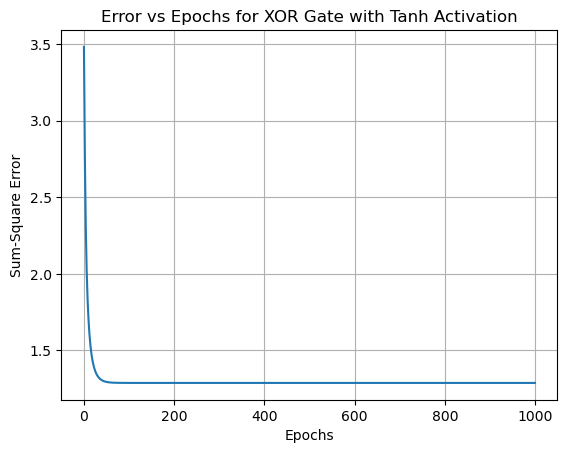

Final Weights with ReLU Activation: [0.31034483 0.31034483]


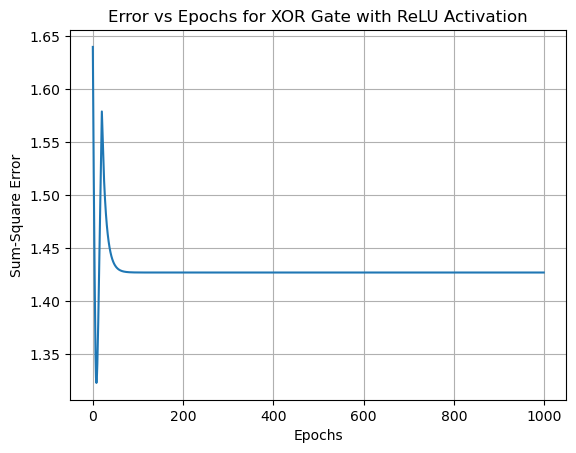

In [18]:
#A9
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # For stable sigmoid function

def summation_unit(inputs, weights):
    """Calculate the weighted sum of inputs."""
    return np.dot(inputs, weights)

def step_activation(x):
    """Step activation function."""
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    """Bipolar step activation function."""
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    """Sigmoid activation function."""
    return expit(x)

def tanh_activation(x):
    """Tanh activation function."""
    return np.tanh(x)

def relu_activation(x):
    """ReLU activation function."""
    return max(0, x)

def comparator_unit(expected, output):
    """Calculate error."""
    return expected - output

def perceptron_xor_gate(inputs, weights, activation_function, learning_rate=0.05, epochs=1000):
    """Train perceptron for XOR gate."""
    weights = np.array(weights, dtype=float)  # Ensure weights are a NumPy array
    error_list = []

    for epoch in range(epochs):
        total_error = 0
        for x, expected in inputs:
            x = np.array(x, dtype=float)  # Ensure inputs are a NumPy array
            weighted_sum = summation_unit(x, weights)
            output = activation_function(weighted_sum)
            error = comparator_unit(expected, output)
            total_error += error ** 2
            weights += learning_rate * error * x  # Update weights
        
        error_list.append(total_error)
        if total_error <= 0.002:
            break

    return weights, error_list

def plot_errors(errors, title):
    """Plot the error values against epochs."""
    plt.plot(errors)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Square Error')
    plt.grid()
    plt.show()

def main():
    # Define inputs for XOR gate
    xor_inputs = [([0, 0], 0), ([0, 1], 1), ([1, 0], 1), ([1, 1], 0)]
    initial_weights = [0.2, -0.75]  # Initial weights

    # Test different activation functions
    activation_functions = {
        "Step": step_activation,
        "Bipolar Step": bipolar_step_activation,
        "Sigmoid": sigmoid_activation,
        "Tanh": tanh_activation,
        "ReLU": relu_activation
    }

    for name, func in activation_functions.items():
        final_weights, errors = perceptron_xor_gate(xor_inputs, initial_weights, func)
        print(f"Final Weights with {name} Activation:", final_weights)
        plot_errors(errors, f'Error vs Epochs for XOR Gate with {name} Activation')

if __name__ == "__main__":
    main()

Final Weights for Two Output Nodes: [[ -49.95 -100.75]
 [ 100.2    49.65]]


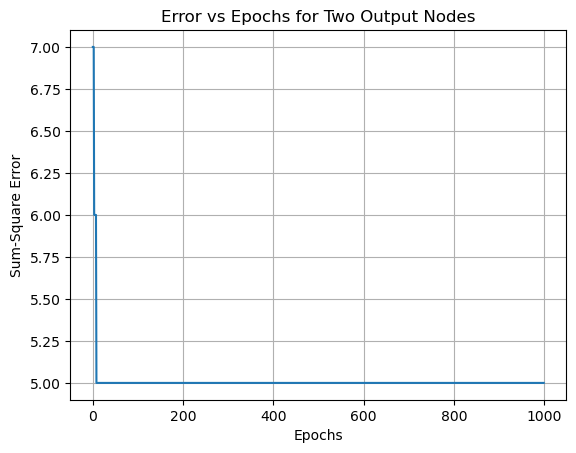

In [22]:
#A10
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # For stable sigmoid function

def summation_unit(inputs, weights):
    """Calculate the weighted sum of inputs."""
    return np.dot(inputs, weights)

def step_activation(x):
    """Step activation function."""
    return 1 if x >= 0 else 0

def comparator_unit(expected, output):
    """Calculate error."""
    expected = np.array(expected)  # Convert expected to numpy array
    output = np.array(output)  # Convert output to numpy array
    return expected - output  # Element-wise subtraction

def perceptron_two_output(inputs, weights, learning_rate=0.05, epochs=1000):
    """Train perceptron with two output nodes."""
    weights = np.array(weights, dtype=float)  # Ensure weights are a NumPy array
    error_list = []

    for epoch in range(epochs):
        total_error = 0
        for x, expected in inputs:
            x = np.array(x, dtype=float)  # Ensure inputs are a NumPy array
            weighted_sum = summation_unit(x, weights)
            output = [step_activation(w) for w in weighted_sum]  # Apply activation to each output
            error = comparator_unit(expected, output)
            total_error += np.sum(np.square(error))  # Sum squared error
            weights += learning_rate * error[:, np.newaxis] * x  # Update weights for each output
        
        error_list.append(total_error)
        if total_error <= 0.002:
            break

    return weights, error_list

def plot_errors(errors):
    """Plot the error values against epochs."""
    plt.plot(errors)
    plt.title('Error vs Epochs for Two Output Nodes')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Square Error')
    plt.grid()
    plt.show()

def main():
    # Define inputs for AND gate with two output nodes
    and_inputs = [([0, 0], [1, 0]), 
                  ([0, 1], [0, 1]), 
                  ([1, 0], [0, 1]), 
                  ([1, 1], [0, 1])]  # Expected outputs for AND gate

    initial_weights_two_output = np.array([[0.2, -0.75], [0.2, -0.75]])  # Initial weights for two outputs

    # Train the perceptron for two output nodes
    final_weights_two_output, errors_two_output = perceptron_two_output(and_inputs, initial_weights_two_output)
    print("Final Weights for Two Output Nodes:", final_weights_two_output)

    # Plot the errors
    plot_errors(errors_two_output)

if __name__ == "__main__":
    main()

In [23]:
#A11
def train_mlp_and_xor():
    """Train MLP for AND and XOR gates."""
    and_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    and_y = np.array([0, 0, 0, 1])
    
    xor_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    xor_y = np.array([0, 1, 1, 0])
    
    mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', learning_rate_init=0.05, max_iter=1000)
    mlp_and.fit(and_X, and_y)
    
    mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', learning_rate_init=0.05, max_iter=1000)
    mlp_xor.fit(xor_X, xor_y)

    return mlp_and, mlp_xor

mlp_and_model, mlp_xor_model = train_mlp_and_xor()
print("MLP Weights for AND Gate:", mlp_and_model.coefs_)
print("MLP Weights for XOR Gate:", mlp_xor_model.coefs_)

MLP Weights for AND Gate: [array([[ 4.4152294 , -4.170654  ],
       [ 4.40725809, -4.17708182]]), array([[ 5.33412223],
       [-5.65601031]])]
MLP Weights for XOR Gate: [array([[-7.21146756,  7.25094014],
       [ 7.1017082 , -7.39256005]]), array([[8.74926266],
       [8.77104251]])]


In [29]:
#A12
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("D:\\NEHA_docs\\Amrita__Docs\\5th SEM\\ML\\PROJECT\\DCT_withoutduplicate_data for project.csv")

# Display the first few rows of the dataset
print(data.head())

# Check for NaN values
if data.isnull().values.any():
    print("Data contains NaN values. Handling missing values...")
    # Option 1: Drop rows with NaN values
    data = data.dropna()
    # Option 2: Fill NaN values with the mean (uncomment if needed)
    # data.fillna(data.mean(), inplace=True)

# Assuming the last column is the label and the rest are features
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values    # Labels

# Convert categorical labels to numeric if necessary
# For example, if your labels are 'Yes' and 'No', you can convert them like this:
# y = np.where(y == 'Yes', 1, 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=1000)
mlp.fit(X_train, y_train)

# Print the accuracy of the trained model
accuracy = mlp.score(X_test, y_test)
print("Accuracy:", accuracy)

             0           1           2            3           4            5  \
0  38687.88477  192.737565  188.366005  2348.285240  188.609889  3359.777672   
1  29532.98806  -54.124623  -22.492524  1648.326090   35.160362  1980.716201   
2  29511.41174  -54.495937  -25.026162  1658.645198   34.814464  2008.855279   
3  29060.40637  -19.466804  -11.668273  1487.612245    7.675333  1788.287900   
4  29039.93589  -19.725400   -9.218980  1497.054471    8.947552  1815.189691   

            6           7          8           9  ...         187         188  \
0 -454.999177 -201.722600 -42.369585 -277.176688  ...  225.163042  375.848590   
1  144.818556   38.937042  56.479929   79.150981  ... -110.815428 -112.520155   
2  145.774409   42.363949  56.631487   84.338212  ... -111.628888 -113.504989   
3   49.023922   24.901637  47.767988   42.011626  ...   -5.242054  -79.615224   
4   49.680814   22.071049  48.720409   37.361647  ...   -5.661566  -82.903805   

          189         190       